In [1]:
import numpy as np
from scipy import signal as sg
import matplotlib.pyplot as plt

In [ ]:
def high_shelf_filter_iir(f0, gain=0., Q=1., fs=192000):
    """
    根据PEQ参数设计二阶IIR数字high shelf滤波器，默认采样率192k
    :param f0: 中心频率
    :param gain: 峰值增益
    :param Q: 峰值带宽
    :param fs: 系统采样率
    :return: 双二阶滤波器系数
    """
    A = np.sqrt(10 ** (gain / 20))
    w0 = 2 * np.pi * f0 / fs
    alpha = np.sin(w0) / (2 * Q)

    b0 = A * ((A + 1) + (A - 1) * np.cos(w0) + 2 * np.sqrt(A) * alpha)
    b1 = -2 * A * ((A - 1) + (A + 1) * np.cos(w0))
    b2 = A * ((A + 1) + (A - 1) * np.cos(w0) - 2 * np.sqrt(A) * alpha)
    a0 = (A + 1) - (A - 1) * np.cos(w0) + 2 * np.sqrt(A) * alpha
    a1 = 2 * ((A - 1) - (A + 1) * np.cos(w0))
    a2 = (A + 1) - (A - 1) * np.cos(w0) - 2 * np.sqrt(A) * alpha

    b = np.array([b0, b1, b2])
    a = np.array([a0, a1, a2])

    h = np.hstack((b / a[0], a / a[0]))

    return h

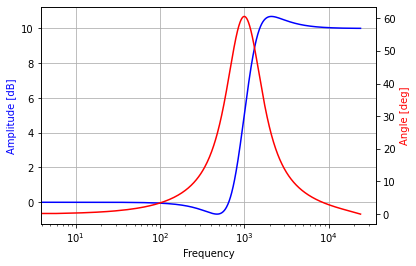

In [5]:
    f0 = 1000
    Q = 1
    fs = 48000
    gain = 10
    sos = high_shelf_filter_iir(f0, gain, Q, fs)
    w, h = sg.sosfreqz(sos, worN=4096, fs=fs)
    fig, ax1 = plt.subplots()
    ax1.semilogx(w, 20 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Frequency')
    ax1.grid()
    ax2 = ax1.twinx()
    ax2.semilogx(w, np.angle(h, deg=True), 'r')
    ax2.set_ylabel('Angle [deg]', color='r')
    ax2.axis('tight')
    plt.show()